In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('ml')  # Adiciona o subdiretório X2 ao caminho de busca de módulos
import data
import model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [21]:
file_path = R'\\wsl.localhost\Ubuntu\home\chafund\GIT\Deploying-a-ML-Model-to-Cloud-Application-Platform-with-FastAPI\data'

In [2]:
df = pd.read_csv(
    '/home/chafund/GIT/Deploying-a-ML-Model-to-Cloud-Application-Platform-with-FastAPI/data/census.csv'
    )
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlgt           32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
cols = list(df.columns)
cols = [col.strip() for col in cols]
df.columns = cols
print(df.columns)

Index(['age', 'workclass', 'fnlgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [4]:
df['salary'].value_counts()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [5]:
num_cols = []
cat_cols = []
for col in df.columns:
    if df[col].dtype != 'object':
        num_cols.append(col)
    else:
        cat_cols.append(col)
print(len(num_cols))
print(num_cols)
cat_cols.remove('salary')
print(len(cat_cols))
print(cat_cols)

6
['age', 'fnlgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
8
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


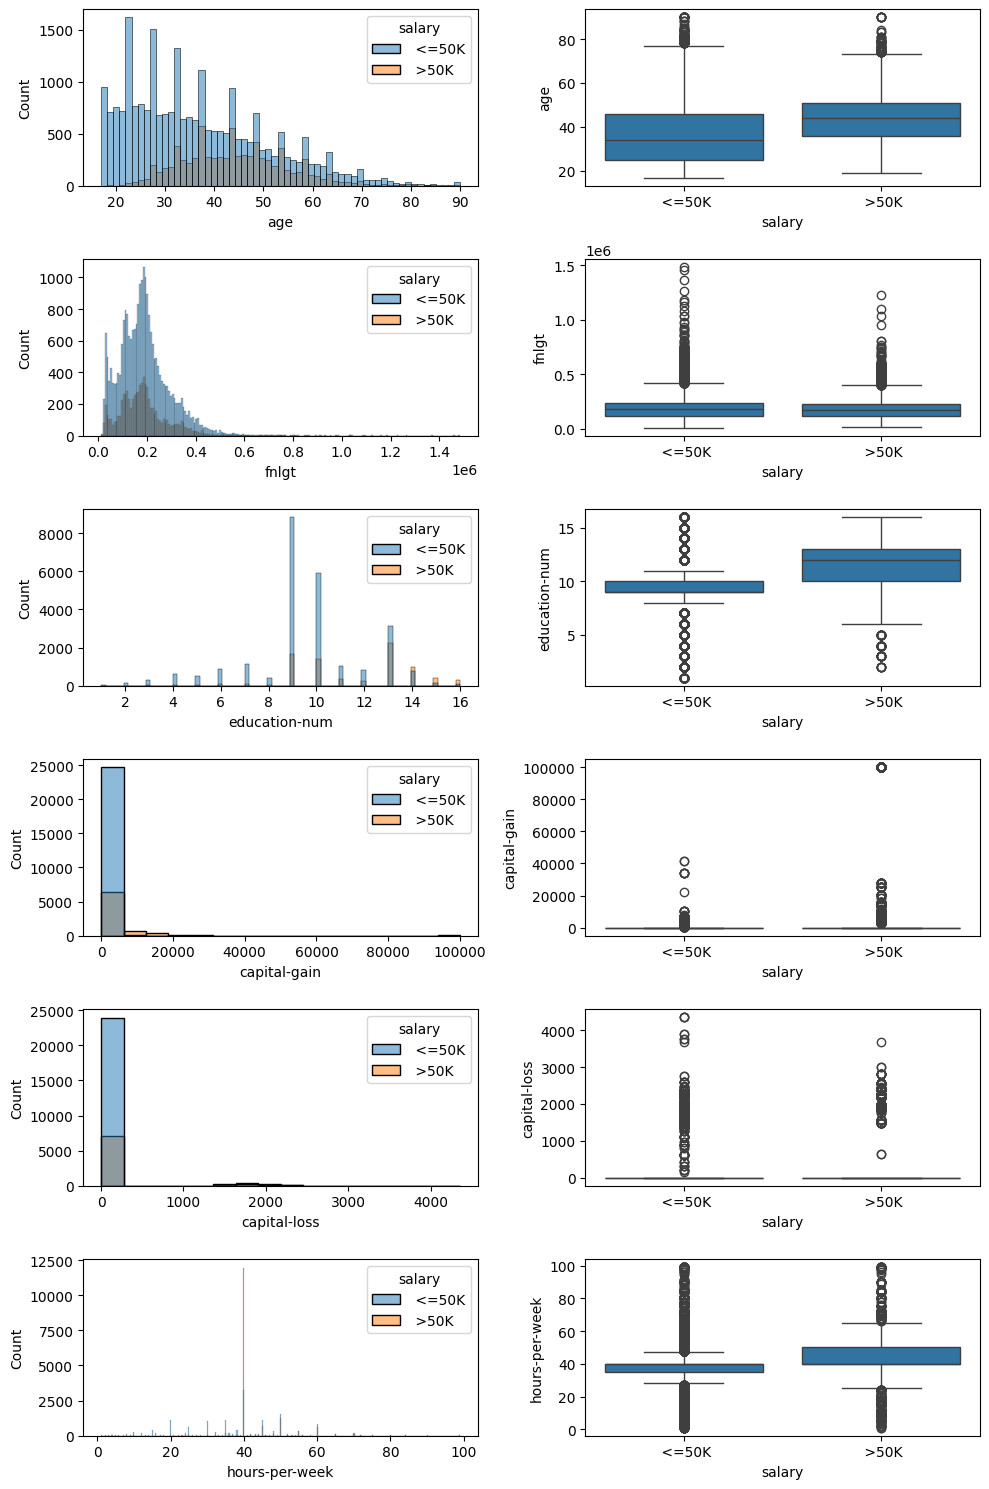

In [43]:
fig, axs = plt.subplots(6, 2, figsize=(10,15))
for i, feat in enumerate(num_cols):
    sns.histplot(data=df, x=feat, hue='salary', ax=axs[i, 0])
    sns.boxplot(data=df, y=feat, x='salary', ax=axs[i, 1])
plt.tight_layout()
plt.show()

C:\Users\chafu\AppData\Local\Temp\ipykernel_20796\3734057614.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\chafu\AppData\Local\Temp\ipykernel_20796\3734057614.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\chafu\AppData\Local\Temp\ipykernel_20796\3734057614.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\chafu\AppData\Local\Temp\ipykernel_20796\3734057614.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

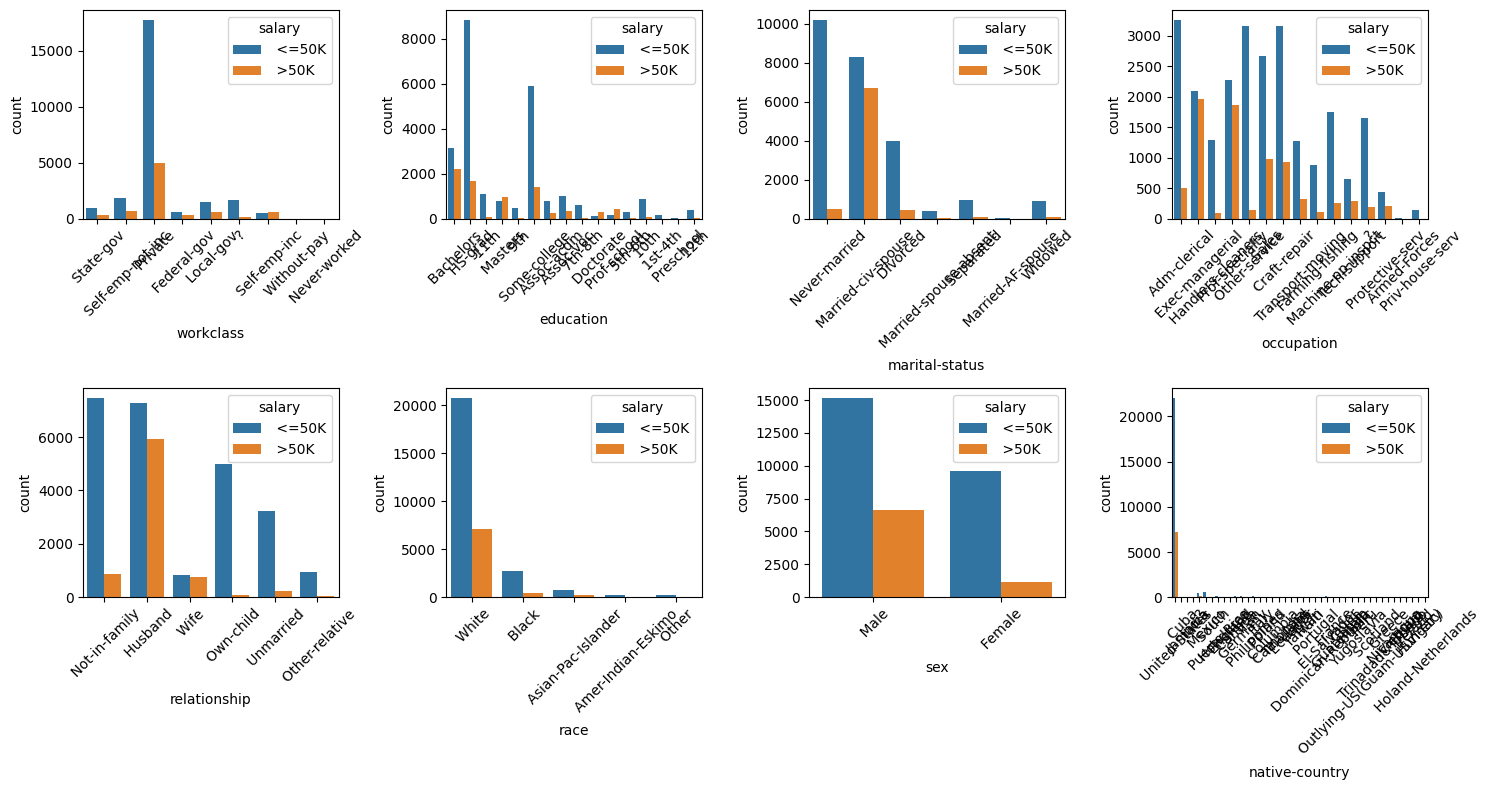

In [57]:
fig, axs = plt.subplots(2, 4, figsize=(15,8))
for i in range(4):
    sns.countplot(data=df, x=cat_cols[i], hue='salary', ax=axs[0, i])
    sns.countplot(data=df, x=cat_cols[i+4], hue='salary', ax=axs[1, i])
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [63]:
print(df['native-country'].nunique())
df['native-country'].value_counts(normalize=True)

42


native-country
United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua 

In [6]:
train, test = train_test_split(df, test_size=0.20, random_state=42)
print(train.shape, type(train))
print(test.shape, type(test))

(26048, 15) <class 'pandas.core.frame.DataFrame'>
(6513, 15) <class 'pandas.core.frame.DataFrame'>


In [7]:
X_train, y_train, encoder, lb = data.process_data(
    train, categorical_features=cat_cols, label="salary", training=True
)
print(X_train.shape, type(X_train), y_train.shape, type(y_train))
print(type(encoder))
print(type(lb))

(26048, 108) <class 'numpy.ndarray'> (26048,) <class 'numpy.ndarray'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
<class 'sklearn.preprocessing._label.LabelBinarizer'>


C:\Users\chafu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
X_test, y_test, _, _ = data.process_data(
    test, categorical_features=cat_cols, label="salary", training=False, encoder=encoder, lb=lb
)
print(X_test.shape)
print(y_test.shape)

(6513, 108)
(6513,)


In [13]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=3,
    n_jobs=-1,
    criterion='gini',
    max_features=0.5,
    oob_score=True,
    random_state=42
)

In [79]:
model = rf.fit(X_train, y_train)

In [80]:
pred = model.predict(X_test)

In [82]:
precision, recall, fbeta = model.compute_model_metrics(y_test, pred)
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'fbeta: {fbeta}')

precision: 0.7760711398544866
recall: 0.6153846153846154
fbeta: 0.6864497676081516


In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

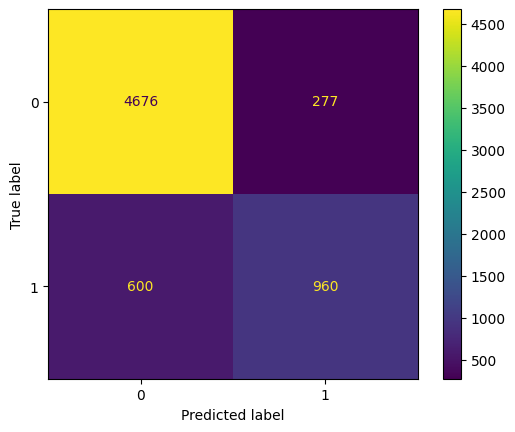

In [90]:
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test, pred)
)
disp.plot()
plt.show()

In [10]:
train, test = train_test_split(df, test_size=0.20)

cat_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
X_train, y_train, encoder, lb = data.process_data(
    train, categorical_features=cat_features, label="salary", training=True
)

C:\Users\chafu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
X_test, y_test, _, _ = data.process_data(
    test, categorical_features=cat_cols, label="salary", training=False, encoder=encoder, lb=lb
)

In [13]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=3,
    n_jobs=-1,
    criterion='gini',
    max_features=0.5,
    oob_score=True,
    random_state=42
)

In [14]:
clf = model.train_model(X_train, y_train, rf)

In [20]:
model_path = '\\\\wsl.localhost\\Ubuntu\\home\\chafund\\GIT\\Deploying-a-ML-Model-to-Cloud-Application-Platform-with-FastAPI\\starter\\trained_model.pkl'

trained_model, trained_encoder, trained_lb = model.import_model(model_path)
print(type(trained_model))
print(type(trained_encoder))
print(type(trained_lb))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
<class 'sklearn.preprocessing._label.LabelBinarizer'>


In [18]:
pred = model.inference(clf, X_test)

precision, recall, fbeta = model.compute_model_metrics(y_test, pred)
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'fbeta: {fbeta}')

precision: 0.7848
recall: 0.6220672162333545
fbeta: 0.694021931376017


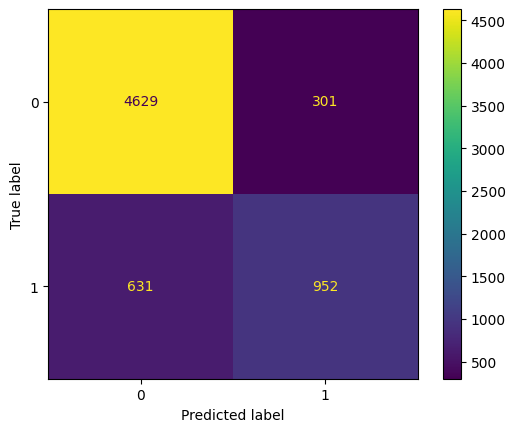

In [16]:
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test, pred)
)
disp.plot()
plt.show()

In [17]:
import pickle

In [18]:
with open('trained_model.pkl', 'wb') as file:
    pickle.dump((clf, encoder, lb), file)

In [20]:
def import_model(model_path):
    with open(model_path, 'rb') as f:
        trained_model, encoder, lb = pickle.load(f)
    return trained_model, encoder, lb

In [21]:
model_path = '\\\\wsl.localhost\\Ubuntu\\home\\chafund\\GIT\\Deploying-a-ML-Model-to-Cloud-Application-Platform-with-FastAPI\\starter\\trained_model.pkl'

trained_model, trained_encoder, trained_lb = import_model(model_path)
print(type(trained_model))
print(type(trained_encoder))
print(type(trained_lb))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
<class 'sklearn.preprocessing._label.LabelBinarizer'>
